# Density models Walkthrough

In [1]:
# import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)

In [3]:
# define plot_clusters function
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

### DBScan

In [4]:
# import make_moons from sklearn
from sklearn.datasets import make_moons

# import DBSCAN
from sklearn.cluster import DBSCAN

In [5]:
db = DBSCAN(eps=0.5,
           min_samples=5,
           metric='euclidean')

In [6]:
# fit and predict
y_db = db.fit_predict(X)

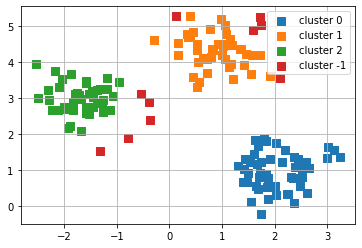

In [7]:
# Plot DBSCAN clusters
plot_clusters(X, y_db)

### Non-spherical Data

In [8]:
# generate moon-shape data
X, y = make_moons(n_samples=200,
                 noise=0.05,
                 random_state=0)

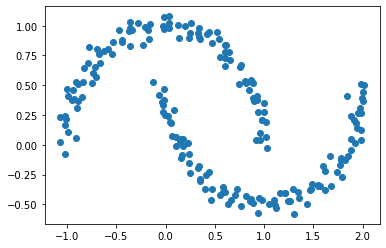

In [11]:
# plot data
plt.scatter(X[:,0], X[:,1])
plt.show()

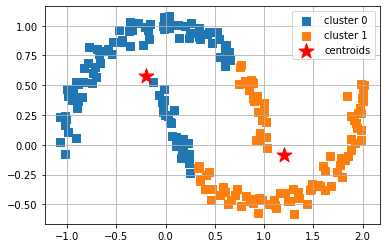

In [14]:
# imoort k-means
from sklearn.cluster import KMeans

# Fit K-means
km = KMeans(n_clusters=2,
           n_init=10,
           random_state=0)

y_km = km.fit_predict(X)

# plot K-means clusters
plot_clusters(X, y_km, plt_cluster_centers=True)

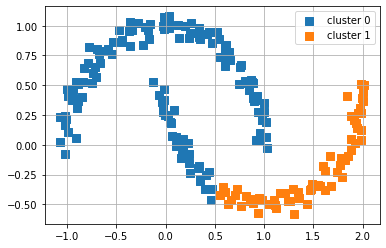

In [16]:
# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# fit Agglomerative clustering
ac = AgglomerativeClustering(affinity='euclidean',
                            linkage='ward',
                            n_clusters = 2)

y_hc = ac.fit_predict(X)

# plot HC clusters
plot_clusters(X, y_hc)

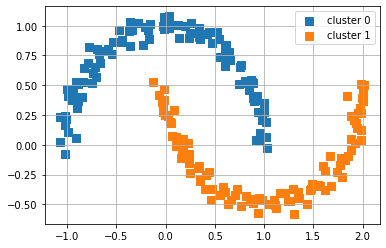

In [17]:
# fit DBSCAN
db = DBSCAN(eps=0.2,
           min_samples=5,
           metric='euclidean')

y_db = db.fit_predict(X)

# plot DBSCAN clusters
plot_clusters(X, y_db)